# Tutorial Feb 1st

In [1]:
cd(joinpath(pwd(),".."))

using Pkg
Pkg.activate(".")

 Activating environment at `C:\Users\paulc\.julia\dev\ECON627_2020\Project.toml`


In [2]:
using LinearAlgebra

Consider the system of equations given by 
$$ A x = b $$ 

For example, we let $A = \Pi'$, $x = \gamma_1$, and $b = \pi'$. 


Denote $A^{\dagger}$ as the pseudo-inverse of $A$. The properties of the pseudo-inverse are

1. $A A^{\dagger} A = A$. 
2. $A^{\dagger} A A^{\dagger} = A^{\dagger}$.
3. $A^{\dagger} A$ is symmetric.
4. $A A^{\dagger}$ is symmetric.

We say $A^{\dagger}$ is a Generalized Inverse when 1 holds. When 1 and 2 hold, we say it's a Reflexive Generalized Inverse. Moreover, $A^{\dagger}$ always exists for any matrix $A$.In the case where $A$ has full column rank, then 

$$ A^{\dagger} = (A'A)^{-1} A'$$

In [3]:
using Random
Random.seed!(1234);

## Example of MP Inverse

In [4]:
y = [3.0;6.0]
X = [1 2; 2 4]

b = pinv(X)*y

2-element Array{Float64,1}:
 0.5999999999999999
 1.1999999999999997

In [5]:
using Plots
gr(fmt=:png);

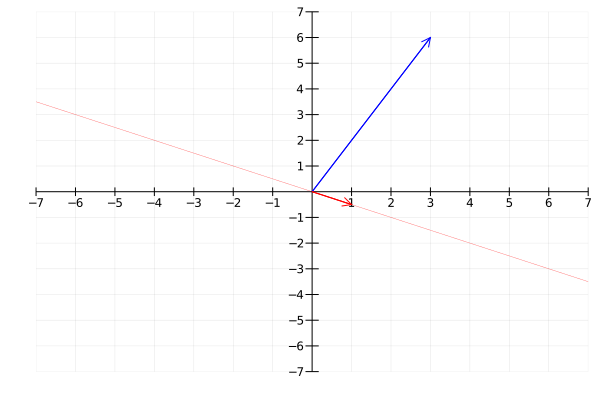

In [6]:
r1 = range(-7,7, length=10)
r2 = -r1/2
r3 = -r1/2 .+ 1.5
#x_vals = [0 0 ; b[1] y[1]]
#y_vals = [0 0 ; b[2] y[2]]

plot([0, y[1]], [0, y[2]], arrow = true, color = :blue,
     legend = :none, xlims = (-7, 7), ylims = (-7, 7),
     xticks = -7:1:7, yticks = -7:1:7,
     framestyle = :origin)
plot!([0 , 1], [0 , -0.5], arrow = true, color = :red)
plot!(r1, r2, color = :red, lw = 0.4, alpha = 0.6)

Notice that the solution to the homogeneous system of linear equations 
$$A x = 0$$

is $$x = (I - A^{\dagger} A) q$$ 

where $q$ is an arbitrary vector. This subspace is shown as the red line above.


The general solution to $Ax = b$ takes the following form

$$ x = A^{\dagger}b + (I - A^{\dagger} A) q$$.

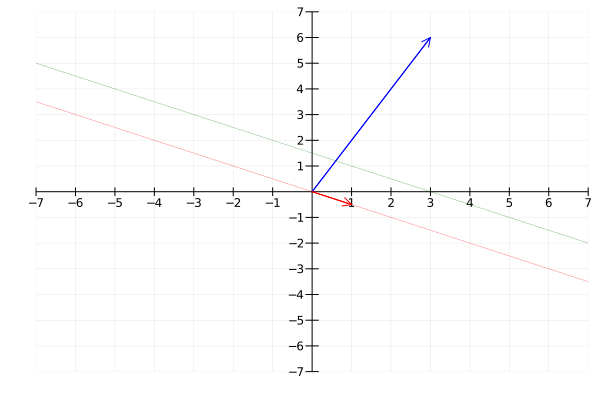

In [7]:
plot!(r1, r3, color = :green, lw = 0.4, alpha = 0.6) 

The MP inverse is unique, i.e., it returns a unique vector living in the subspace given by the green line.

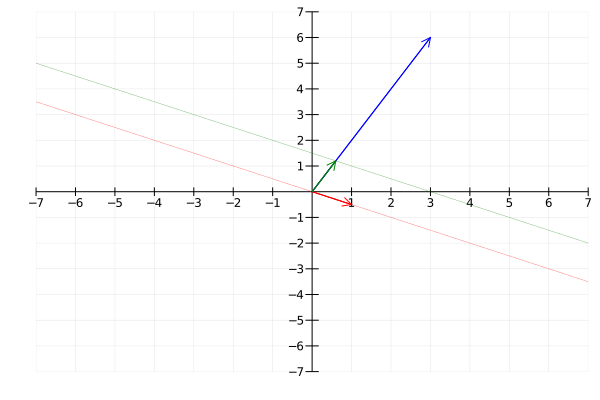

In [8]:
plot!([0 , b[1]], [0 , b[2]], arrow = true, color = :green)

## Exact Identification 

Consider the case where $A$ is an $l\times k$ matrix with full column rank, and $l=k$.

$$ A x = b $$

For example, $A:=Z'X$ and $b:=Z'y$. The solution is given by $x = A^{-1} b$.

## Overidentification

Now consider the case where $l>k$. Let $W$ be a positive definite and symmetric matrix.  Then we can write

$$ W^{1/2} A x = W^{1/2} b$$ 
$$ A' W^{1/2} W^{1/2} A x = A' W^{1/2}  W^{1/2} b$$ 
$$ A' W A x = A' W b$$ 

Now $A' W A $ is a square matrix with full rank $k$, so we can invert it. Then

$$x = (A' W A)^{-1} A' W b$$

where $A^{g} = (A' W A)^{-1} A'W$.


We'll see the conditions we need so that the generalized inverse $A^g$ is a MP inverse of $A$.  Let's check the four rules that any generalized inverse must satisfy.

1. $A A^g A = A (A'WA)^{-1} A'W A = A$
2. $A^g A A^g = (A'WA)^{-1} A'WA (A'WA)^{-1} A'W = A^g$
3. $A^g A$ must be symmetric, which is the case since it equals the identity matrix.
4. $AA^g$ must be symmetric. Notice that the following equation only holds if $W=I$.

$$ A(A'WA)^{-1}A'W= W'A (A'WA)^{-1} A'$$


Hence, the MP inverse of $A$ iss given by

$$A^{\dagger} = (A'A)^{-1} A'$$.

Another useful thing to keep in mind is that if $X$ has full column rank, then so does $X'X$. To see this, consider some $z \in N(X)$, i.e., $X z = 0$.  Then, notice that $X'X z = 0$ as well. This implies that $N(X) \subseteq N(X'X)$. 

Similarly, take some $w \in N(X'X)$, i.e., $X'X w=0$. Then we can see that $w' X'X w = 0$, so it follows that $Xw =0$. This implies that $N(X'X) \subseteq N(X)$.  

Finally, $N(X) = N(X'X)$ so the result follows by the rank nullity theorem.

# More Julia Stuff

## Going from summation to matrices

Let $Z_i$ be a vector of size $l$, and $u_i$ be a scalar. Let  $$\hat{\Omega} = \frac{1}{n} \sum_{i=1}^n u_i^2 Z_i Z_i'$$


We can rewrite

$$
\begin{align}
\hat{\Omega} &= \frac{1}{n} \sum_{i=1}^n (u_i Z_i) (u_i Z_i)' \\
&= \frac{1}{n} \sum_{i=1}^n \tilde{Z}_i \tilde{Z}_i' \\
&= \frac{1}{n}\tilde{Z}' \tilde{Z}
\end{align}
$$

so in Julia we can use the original matrix $Z$ and redefine

$$
\begin{align}
\tilde{Z} &= \left( \begin{array}{c}  Z_1' \times u_1 \\ \vdots \\ Z_n' \times u_n  \end{array} \right) \\
&= \left( \begin{array}{c}  Z_1' \\ \vdots \\ Z_n'  \end{array} \right) .^* u \\
&= Z .^* u
\end{align}
$$

In other words, we can just broadcast this operation instead of doing a loop!

## Generate some DGPs

This is just to show that you should be careful about the object types when you simulate your data generating process. To work with linear algebra stuff in Julia we need the elements of our Arrays to be numbers (Int, Float, etc.). 

In [9]:
using Distributions
W = rand(Uniform(0,1),10);

In [10]:
W.<0.2

10-element BitArray{1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [11]:
1*(W.<0.2)

10-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [12]:
W.==0.1

10-element BitArray{1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [13]:
1*(W.==0.1)

10-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

## About Functions

In [9]:
function f1()
    w =5 
    z= 6
    return  X,  y, Z
end

f1 (generic function with 1 method)

In [ ]:
y , Z , X = f1()

In [10]:
w , z = f1()

(5, 6)

In [11]:
w

5

In [12]:
z, w = f1()

(5, 6)

In [13]:
z 

5

In [15]:
result = f1()

(5, 6)

In [16]:
result[1]

5

In [17]:
result1, result2 = f1()

(5, 6)

In [6]:
using Parameters
@unpack w , z = f1()

LoadError: UndefVarError: f1 not defined

In [7]:
function f2()
    w =5 
    z= 6
    return (w = w ,z = z)
end

f2 (generic function with 1 method)

In [8]:
@unpack z , w = f2()


(w = 5, z = 6)

In [21]:
w

5

# Solving Linear Systems of Equations

Usually our moment conditions leave us with something that looks like a linear system of equations.  For instance, in the case of OLS we have the following system: 

$$ X'X * \beta  = X'Y $$

which can be rewritten as 

$$ A x  = b $$ 


We say a matrix is **ill-conditioned** if the basis of eigenvectors are close to, but not exactly, collinear. This can create numerical errors roughly in proportion to the base-10 log of the condition number. I don't think this is gonna be an issue in any of the computations you will perform in the course, but these type of issues can arise when we are, for instance, running models with many fixed effects (high dimensional FE). 


The condition number (using the 2-norm) can be computed as 

$$ k(A) = || A || * || A^{-1} || $$

In [22]:
#Create ill-conditioned matrix
ϵ = 1E-6
A = [1.0 0.0
     1.0 ϵ]
cond(A)

2.0000000000005004e6

In [23]:
#Notice that it has both huge and tiny values!
inv(A)

2×2 Array{Float64,2}:
  1.0    0.0
 -1.0e6  1.0e6

This is actually one of the reasons to avoid using `inv()` in practice, and instead use the backslash notation, which will perform better. Another reason is that if the A matrix is sparse, we make it dense when we invert it. The backslash notation will exploit the fact that A was sparse in the first place!

### Factorization

One way to fix this is to do a factorization, which will allow us to compute a more stable inverse (like a triangular matrix). For instance, a QR decomposition splits A into an orthogonal matrix (inverse = transpose) and an upper triangular matrix. The solution is then simplified as

$$ Q R x  = b $$ 
$$ R x  = Q^{T} * b $$
$$ x = R^{-1}  Q^{T} * b $$

In [24]:
illX = [ones(1000)'; ϵ * I]'
illXX = illX'illX;
illXY = illX' * rand(1000,1);

Q, R = qr(illXX);
βsol_qr = R \ (Q'* illXY)


1001×1 Array{Float64,2}:
     -0.06605381678642297
 598221.7312447234
 810122.6099694951
 240263.063336702
 675595.1591124337
 647166.0084359412
 527913.8200819836
 920861.1063302681
 714012.2956293907
 850916.947485414
 146489.90981920974
 598314.6683700735
 635881.7693053584
      ⋮
 349730.8636149496
 515960.68280050106
 804662.9024518384
 909747.3213306795
      1.0272611039231163e6
 255843.9451293889
 781915.8389725181
 622244.809550974
 647410.9046904142
 217498.04613603526
 714935.7669957685
  76959.70642201835

In [25]:
cond(illXX)

3.229517786600101e29

In [26]:
cond(R)

2.873181747420282e30

In [27]:
cond(R) > cond(illXX)

true

Depending on the particular application and the factorization chosen we can improve a lot the conditioning number.

### Iterative Solution (Krylov Methods)

This is will iterate the system on $x^k$ until it reaches a solution. It is an alternative to factorization. However, it has slow convergence rates when the matrix in the linear system is ill-conditioned. 

A solution to this is to set a matrix $ P $ which has numerically stable inverse. Consider the following case of a right preconditioner P:

$$ A x = b $$
$$ A P^{-1} P  x = b $$
$$ (AP^{-1}) y = b $$ 

so we can use the last equation to solve for $y$ , and then recover $x$ from $P x = y $.

In [28]:
#This creates a sparse matrix with 10% of zeros
using SparseArrays
A = sprand(100, 100, 0.1)   
A = A * A'  
cond(Matrix(A)) #Can be ill conditioned!

2.252967499034646e6

One of the standard Krylov methods is Conjugate Gradient, which works for symmetric and positive definite matrices. This is exactly the case of our least squares problem!

We can choose among many preconditioners, and there's no really a way to know which is gonna work the best. In this case I'll show the solution using an Algebraic Multigrid (AMG) preconditioner.

In [29]:
using IterativeSolvers, AlgebraicMultigrid

In [30]:
#Initial value
β_init = zeros(100)
b = A * rand(100,1)
P = aspreconditioner(ruge_stuben(A))
sol = cg!(β_init, A, b, Pl = P, log=true, maxiter = 1000)
sol[end]

Converged after 61 iterations.

In [31]:
#Show the vector of coefficients
sol[1]

100-element Array{Float64,1}:
 0.16405895537537987
 0.8338862499533093
 0.6729690067643582
 0.21597674474347967
 0.9320685196851929
 0.40047592885552513
 0.8923818613422886
 0.30536487447846283
 0.6502312110384916
 0.1925273848800067
 0.043150951673763156
 0.5208971006078669
 0.3602136095466112
 ⋮
 0.10974141005774023
 0.9808525251234187
 0.5671189176459897
 0.8433012250510562
 0.7409645453517361
 0.21553074928495264
 0.4357241037706547
 0.1365508237991236
 0.8582924172992177
 0.9507275760992945
 0.7837857249519556
 0.7724416446529933

In [32]:
sol2 = cg!(β_init, A, b, Pl = I, log=true, maxiter = 1000)
sol2[end]

Converged after 182 iterations.

In [33]:
sol2[1]

100-element Array{Float64,1}:
 0.16405894584611222
 0.8338862577060364
 0.6729690027152878
 0.21597672225767087
 0.9320685329462776
 0.4004759437957622
 0.8923818816632996
 0.3053648401962918
 0.6502312074355434
 0.19252737742443268
 0.04315098045014966
 0.5208970765988248
 0.36021360859751445
 ⋮
 0.10974140877551393
 0.9808525104576047
 0.5671189464969624
 0.8433012212891899
 0.7409645094358497
 0.21553074126158178
 0.4357240964313595
 0.13655083695764936
 0.8582924489056848
 0.9507275651804992
 0.783785739893548
 0.7724416301570179

Something I would like to point out is that using a preconditioner does not ensure that the number of iterations will reduce.